In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Explorando os dados para a Regressão Logística...

In [2]:
df = pd.read_csv("./Dados/dados_voz_genero.csv")

In [3]:
print (df.shape)
df.head(5)

(3168, 20)


,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1.0
1,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1.0
2,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1.0
3,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1.0
4,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1.0


In [4]:
df_male = df[df.label == 1]
df_female = df[df.label == 0]

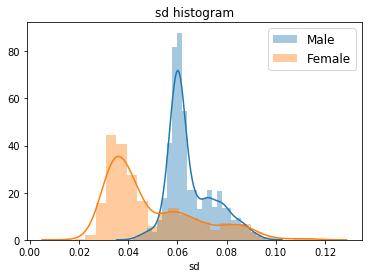

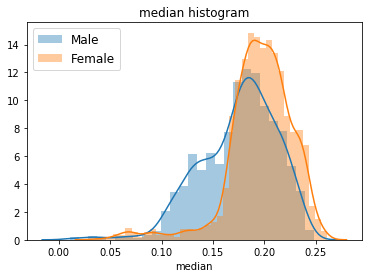

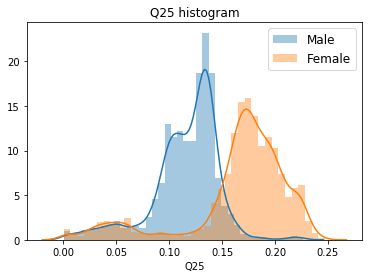

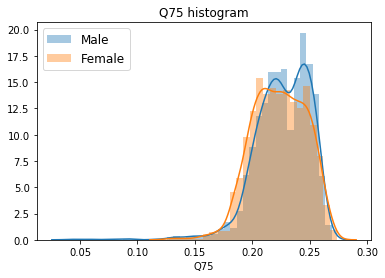

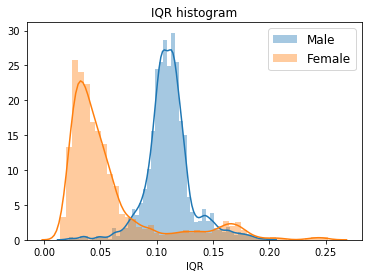

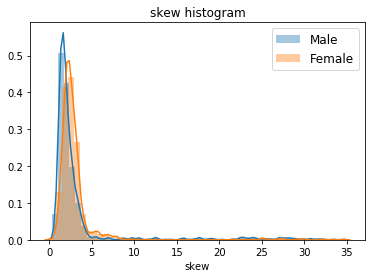

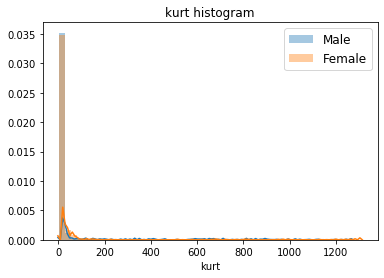

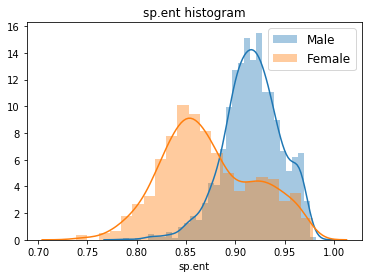

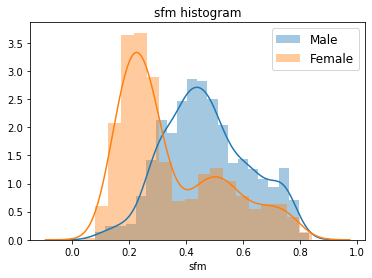

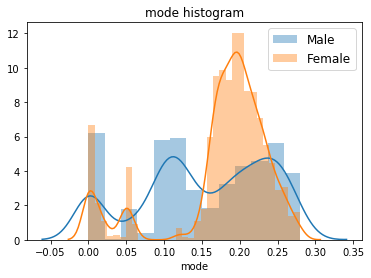

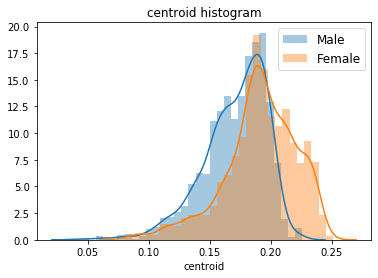

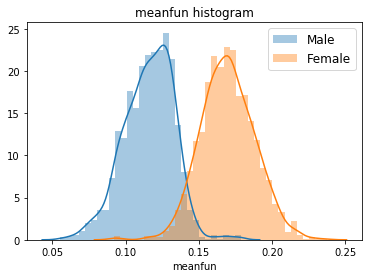

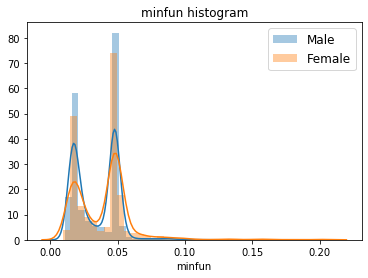

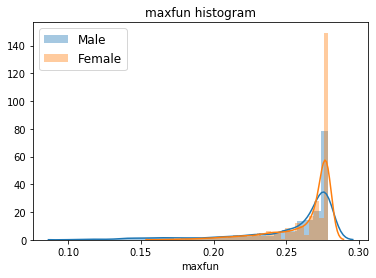

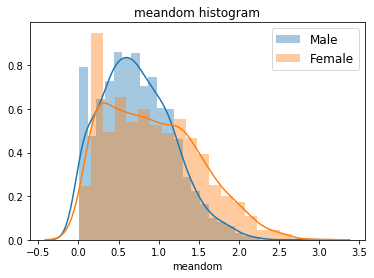

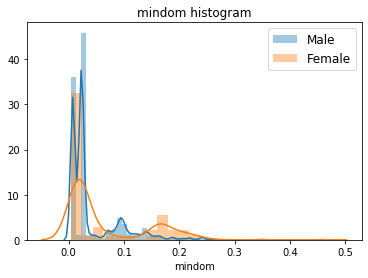

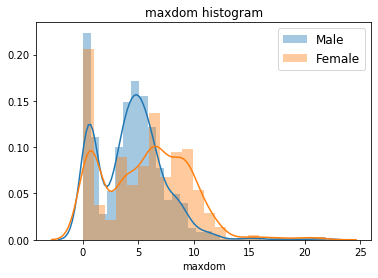

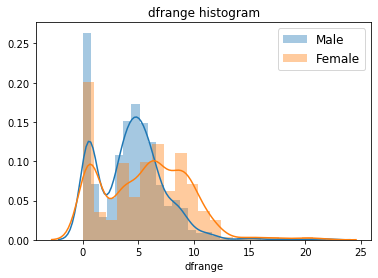

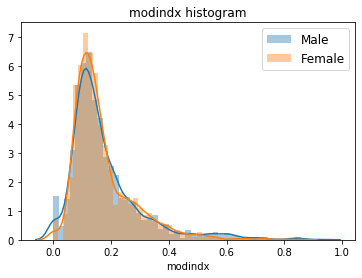

In [5]:
column_names = df.columns[:-1]
for column_name in column_names:
    plt.figure()
    sns.distplot(df_male[column_name],  kde=True, label='Male')
    sns.distplot(df_female[column_name],  kde=True, label='Female')
    plt.legend(prop={'size': 12})
    plt.title(column_name + " histogram")

[Text(0, 0.5, 'sd'),
 Text(0, 1.5, 'median'),
 Text(0, 2.5, 'Q25'),
 Text(0, 3.5, 'Q75'),
 Text(0, 4.5, 'IQR'),
 Text(0, 5.5, 'skew'),
 Text(0, 6.5, 'kurt'),
 Text(0, 7.5, 'sp.ent'),
 Text(0, 8.5, 'sfm'),
 Text(0, 9.5, 'mode'),
 Text(0, 10.5, 'centroid'),
 Text(0, 11.5, 'meanfun'),
 Text(0, 12.5, 'minfun'),
 Text(0, 13.5, 'maxfun'),
 Text(0, 14.5, 'meandom'),
 Text(0, 15.5, 'mindom'),
 Text(0, 16.5, 'maxdom'),
 Text(0, 17.5, 'dfrange'),
 Text(0, 18.5, 'modindx'),
 Text(0, 19.5, 'label')]

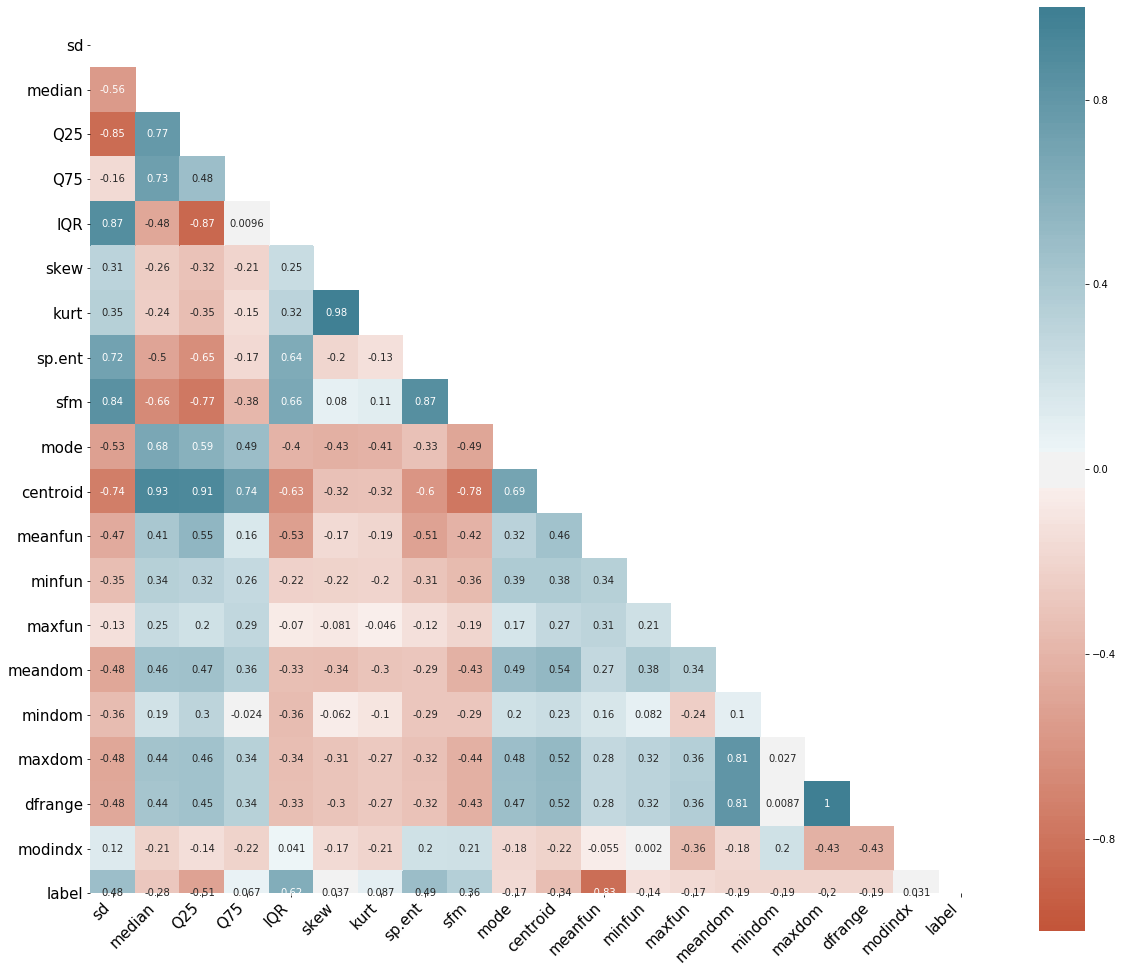

In [6]:
# calcula correlações
corr = df.corr()

# máscara para filtrar matriz diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# plota heatmap
plt.figure(figsize = (20,17))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    mask = mask,
    annot = True,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize = 15
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize = 15
)

### Implementação do algoritmo de regressão logística

In [7]:
def logistic(X, W):
    '''
        Calcula a função logística dos dados X a partir dos pesos W
        dim(X) = (m, k+1)
        dim(W) = (k+1, 1)
    '''
    ŷ = 1/(1 + np.exp(-np.dot(X, W)))
    return ŷ

In [8]:
def fit(X, Y, learn_step = 0.01, train_iterations = 1000):
    ŵ = np.random.rand(X.shape[1])

    for _ in range(train_iterations):
        gradiente = np.zeros(ŵ.shape)
        #print (ŵ)
        for i in range(len(gradiente)):
            gradiente[i] += np.dot(((logistic(X, ŵ) - Y).T), X[:, i])
        gradiente = gradiente * learn_step
        ŵ = ŵ - gradiente
        #if _%1000 == 0:
            #print("Iteração", _, "de", train_iterations)
    return ŵ

In [9]:
def predict(X, W, threshold):
    ŷ = logistic(X, W)
    return [np.greater_equal(ŷ, threshold).astype(int), ŷ]

In [10]:
def confusion_matrix(Y, Ŷ):
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    
    for i in range(len(Y)):
        if Y[i] == 1 and  Ŷ[i] == 1:
            TP += 1
        elif Y[i] == 1 and Ŷ[i] == 0:
            FN += 1
        elif Y[i] == 0 and Ŷ[i] == 1:
            FP += 1
        elif Y[i] == 0 and Ŷ[i] == 0:
            TN += 1
            
    taxa_de_falso_negativo = FN/(TP+FN)
    taxa_de_falso_positivo = FP/(TN+FP)
    taxa_de_erro = (FP+FN)/(TP+FN+FP+TN)
    acuracia = (TP+TN)/(TP+FN+FP+TN)
    precisao = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    confusion_matrix = np.matrix([[TP, FN], [FP, TN]])
    #print ("|Verdadeiro positivo|\t |Falso negativo|\n|Falso positivo|\t |Verdadeiro negativo|\n")
    print (confusion_matrix)
    print ("Taxa de falso negativo(%):", 100*taxa_de_falso_negativo)
    print ("Taxa de falso positivo(%):", 100*taxa_de_falso_positivo)
    print ("Erro(%):", 100*taxa_de_erro)
    print ("Acurácia(%):", 100*acuracia)
    print ("Precisão(%):", 100*precisao)
    print ("Recall(%):", 100*recall)    
    return confusion_matrix

In [11]:
def ROC(Y, Ŷ):
    ''' Retorna os pontos da ROC - Recall vs Taxa de falso positivo'''
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    roc_y = 0
    roc_x = 0
    
    for i in range(len(Ŷ)):
        if Y[i] == 1 and Ŷ[i] == 1:
            TP += 1
        if Y[i] == 1 and Ŷ[i] == 0:
            FN += 1
        if Y[i] == 0 and Ŷ[i] == 1:
            FP += 1
        if Y[i] == 0 and Ŷ[i] == 0:
            TN += 1
    # calcula a taxa de verdadeiros positivos
    roc_y = (TP)/(TP+FN)
    # calcula a taxa de falsos positivos
    roc_x = (FP)/(TN+FP)
            
    return [roc_y, roc_x]

In [12]:
def f_score(Y, Ŷ, m = 1):
    ''' Retorna os pontos da F-medida - Recall vs Taxa de falso positivo'''
    TP = 0
    FN = 0
    FP = 0
    TN = 0
    f_score_y = 0
    f_score_x = 0
    
    for i in range(len(Ŷ)):
        if Y[i] == 1 and Ŷ[i] == 1:
            TP += 1
        if Y[i] == 1 and Ŷ[i] == 0:
            FN += 1
        if Y[i] == 0 and Ŷ[i] == 1:
            FP += 1
        if Y[i] == 0 and Ŷ[i] == 0:
            TN += 1
    recall = (TP)/(TP+FN)
    precisao = (TP)/(TP+FP)
    f_score_y = (m+1) * recall * precisao / (recall + m * precisao)
            
    return f_score_y

In [13]:
def best_threshold(roc_y, roc_x, thresholds):
    ''' Encontra o threshold ótimo, sendo o ponto ótimo como o valor de máximo True positivo e menor Falso positivo'''
    aux = np.zeros(len(roc_y))
    for i in range(len(roc_y)):
        aux[i] = roc_y[i] - roc_x[i]
    return thresholds[(np.where(aux == np.amax(aux))[0])]

In [14]:
def normalize_dataset(df):
    ''' Normaliza os dados do dataset para que seus valores máximos não extrapolem 1'''
    column_names = df.columns[:-1]
    
    for column_name in column_names:
        df[column_name] = df[column_name]/max(df[column_name])

In [15]:
def split_dataset(df, frac = 0.8):
    ''' Divide aleatoriamente o dataset em treino e teste em uma fração dita por "frac" '''
    df_copy = df.copy()
    train_set = df_copy.sample(frac = frac, random_state = 0)
    test_set = df_copy.drop(train_set.index)    
    return [train_set, test_set]

### Preparação dos dados para treino

In [16]:
df_temp = df.copy()
normalize_dataset(df_temp)
df_train, df_test = split_dataset(df_temp, frac = 0.8)

X_train = df_train.loc[:,'sd':'modindx'].values
X_train = np.insert(X_train, 0, 1, 1)
Y_train = df_train['label'].values

X_test = df_test.loc[:,'sd':'modindx'].values
X_test = np.insert(X_test, 0, 1, 1)
Y_test = df_test['label'].values

### Loop de treinamento

In [18]:
thresholds = np.arange(start = 0, stop = 1, step = 0.01)
roc_y, roc_x, f_score_y = np.zeros(len(thresholds)), np.zeros(len(thresholds)), np.zeros(len(thresholds))
for i in range(len(thresholds)): 
    ŵ = fit(X_train, Y_train, learn_step = 0.004, train_iterations = 500)
    ŷ, ŷ_without_threshold = predict(X_test, ŵ, threshold = thresholds[i])
    roc_y[i], roc_x[i] = ROC(Y_test, ŷ)
    f_score_y[i] = f_score(Y_test, ŷ)

In [19]:
df_ŷ_without_threshold = pd.DataFrame(data = ŷ_without_threshold)
df_ŷ_without_threshold.to_csv('y_without_threshold.csv')

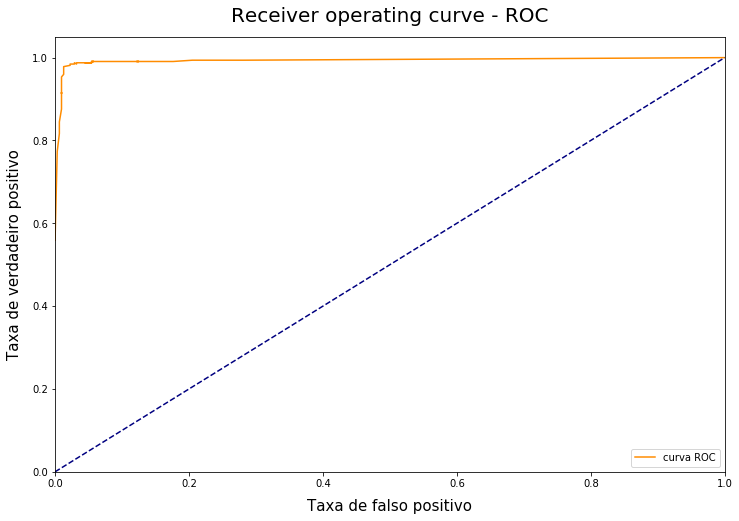

In [20]:
plt.figure(figsize = (12,8))
plt.plot(roc_x, roc_y, color='darkorange', label='curva ROC')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de falso positivo', fontsize = 15, labelpad = 10)
plt.ylabel('Taxa de verdadeiro positivo', fontsize = 15, labelpad = 10)
plt.title('Receiver operating curve - ROC', fontsize = 20, pad = 15)
plt.legend(loc="lower right")
plt.show()

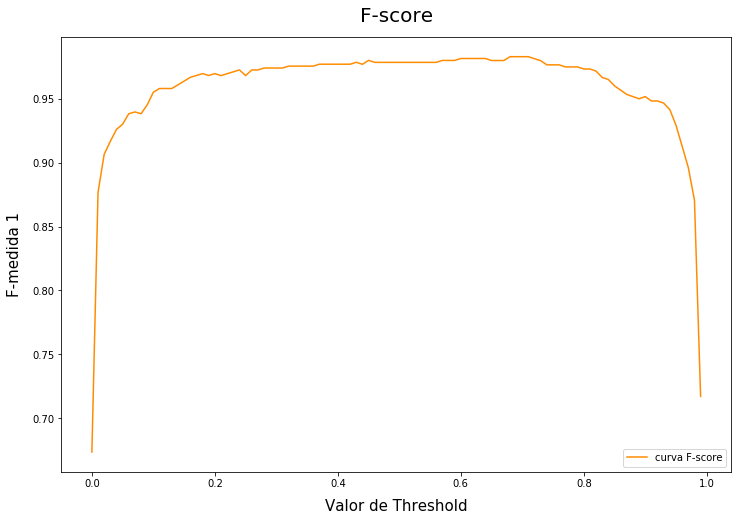

In [21]:
plt.figure(figsize = (12,8))
plt.plot(thresholds, f_score_y, color='darkorange', label='curva F-score')
plt.xlabel('Valor de Threshold', fontsize = 15, labelpad = 10)
plt.ylabel('F-medida 1', fontsize = 15, labelpad = 10)
plt.title('F-score', fontsize = 20, pad = 15)
plt.legend(loc="lower right")
plt.show()

### Para encontrar o melhor valor de threshold realizei a soma de todos pontos ($Y_i$, $-X_i$) da curva roc. A partir desta soma obtive seu valor máximo, sendo este valor o ponto mais próximo da diagonal superior esquerda, pois maxima os valores de 'Verdadeiro positivos' ($max(Y_i)$) e minimiza os valores de 'Falso negativos' ($max(-X_i)$)

In [30]:
threshold_best = best_threshold(roc_y, roc_x, thresholds)[0]
threshold_best

0.68

### Treinando modelo com valores ótimos

In [33]:
ŵ = fit(X_train, Y_train, learn_step = 0.004, train_iterations = 100000)
ŷ, ŷ_without_threshold = predict(X_test, ŵ, threshold = threshold_best)

In [34]:
cm = confusion_matrix(Y_test, ŷ)

[[316   6]
 [  6 306]]
Taxa de falso negativo(%): 1.8633540372670807
Taxa de falso positivo(%): 1.9230769230769231
Erro(%): 1.8927444794952681
Acurácia(%): 98.10725552050474
Precisão(%): 98.13664596273291
Recall(%): 98.13664596273291


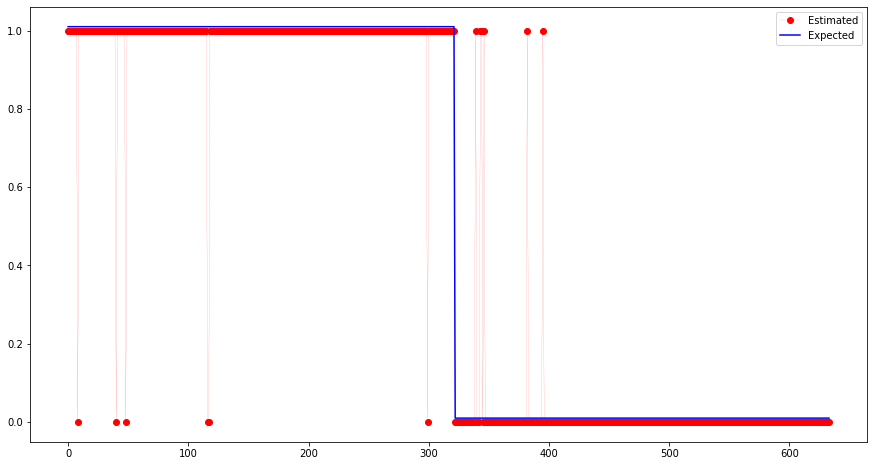

In [40]:
plt.figure(figsize = (15,8))
plt.plot(ŷ, color = "red", label = "Estimated", linewidth = 0.1, marker = 'o')
plt.plot(Y_test+0.01, color = "blue", label = "Expected")
plt.legend()